In [1]:
import os
import sounddevice as sd
import numpy as np


import numpy as np
import pandas as pd
# import pingouin as pg
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.io import loadmat
from scipy import stats
import scipy.signal as scpsig

import seaborn as sns
import sys

In [2]:
data =  np.array([2.47440491e+02, 1.36456146e+02, 4.04819908e+01, 3.50237465e+01
, 5.68567276e+01, 2.13781300e+01, 5.18533363e+01, 1.30088196e+02
, 2.12871597e+02, 2.69273468e+02, 3.10665161e+02, 3.53421417e+02
, 3.95722839e+02, 4.21649506e+02, 4.36204834e+02, 4.35749969e+02
, 4.26198029e+02, 4.13916992e+02, 4.24833466e+02, 4.22559204e+02
, 3.80712646e+02, 3.45688904e+02, 2.96109833e+02, 1.36911011e+02
, 8.68770828e+01, 2.16965271e+02, 2.05139084e+02, 8.36931076e+01
, 8.91513519e+01, 2.60631256e+02, 3.82986938e+02, 4.27562592e+02
, 3.79802948e+02, 2.65179779e+02, 1.64202240e+02, 1.24629951e+02
, 5.32178993e+01, 6.32246819e+01, 7.18669052e+01, 8.73319397e+01
, 3.05661774e+02, 4.17555817e+02, 4.13462128e+02, 3.65702484e+02
, 3.16123413e+02, 2.99293823e+02, 2.78370544e+02, 1.91493469e+02
, 3.82077217e+01, 9.96129913e+01, 1.33272171e+02, 7.27766113e+01
, 3.63883066e+00, 3.45688896e+01, 6.36795349e+01, 9.14256210e+01
, 9.87032852e+01, 1.12803749e+02, 1.34636734e+02, 1.18261993e+02
, 1.18716850e+02, 2.22423523e+02, 4.22104370e+02, 5.90855103e+02
, 6.34975952e+02, 5.76754639e+02, 4.57582947e+02, 3.04752075e+02
, 2.07868195e+02, 2.10597321e+02, 2.63815216e+02, 3.37501556e+02
, 4.23014069e+02, 4.99884369e+02, 4.94426117e+02, 3.93903412e+02
, 2.38343414e+02, 1.15987724e+02, 4.36659698e+01, 8.18736935e+00
, 1.22810535e+01, 1.81941533e+00, 3.63883057e+01, 8.36931076e+01
, 7.55057373e+01, 6.41343918e+01, 1.10529480e+02, 1.80576965e+02
, 2.53808441e+02, 3.60699097e+02, 4.93516418e+02, 5.54011963e+02
, 5.21717346e+02, 4.99429504e+02, 5.42640625e+02, 6.07684692e+02
, 6.24514282e+02, 5.65383301e+02, 4.22104370e+02, 2.97019562e+02
, 2.91106445e+02, 3.40685516e+02, 3.80712646e+02, 3.95267975e+02
, 3.86625763e+02, 3.71615570e+02, 3.26130188e+02, 2.42891953e+02
, 1.34636734e+02, 6.00407066e+01, 7.64154434e+01, 9.41547470e+01
, 9.77935715e+01, 1.46917786e+02, 2.02409958e+02, 2.08323059e+02
, 1.86035217e+02, 1.12803749e+02, 4.54853821e+00, 1.05071236e+02
, 1.67841064e+02, 1.82851242e+02, 2.36978851e+02, 3.43869507e+02
, 4.13462128e+02, 4.28927155e+02, 4.27107758e+02, 4.01181091e+02
, 3.57515106e+02, 2.89287048e+02, 1.76028427e+02, 5.86761436e+01
, 3.54785995e+01, 8.96062088e+01, 7.82348557e+01, 1.45553226e+01
, 3.18397689e+00, 5.00339203e+01, 1.09164917e+02, 1.15987724e+02
, 7.41411743e+01, 2.86557922e+01, 2.63815231e+01, 8.00542755e+01
, 1.11894043e+02, 1.37820709e+02, 1.19171707e+02, 6.50440979e+01
, 1.22810535e+01, 3.50237465e+01, 6.59538040e+01, 3.54785995e+01
, 7.73251534e+00, 4.45756760e+01, 1.05526093e+02, 1.30088196e+02
, 1.25994514e+02, 1.11894043e+02, 1.07800362e+02, 1.62382812e+02
, 1.93767731e+02, 1.35546448e+02, 5.68567276e+01, 3.30678741e+02
, 5.22172180e+02, 5.43095459e+02, 4.62131500e+02, 3.42504944e+02
, 2.35159439e+02, 1.83306091e+02, 1.47827499e+02, 1.37820709e+02
, 1.41914398e+02, 1.33727020e+02, 1.05526093e+02, 6.41343918e+01
, 1.04616385e+01, 3.50237465e+01, 5.09436302e+01, 5.50373154e+01
, 9.46095963e+01, 1.51466324e+02, 1.60563400e+02, 1.21445976e+02
, 6.91377792e+01, 2.04684219e+01, 3.13849144e+01, 6.73183670e+01
, 8.23285446e+01, 1.22810532e+02, 1.85580368e+02, 2.17420135e+02
, 2.11507034e+02, 1.68750778e+02, 1.09619774e+02, 6.54989548e+01
, 4.32111130e+01, 2.13781300e+01, 6.36795378e+00, 2.09232769e+01
, 4.59402390e+01, 5.36727524e+01, 4.23014069e+01, 2.59266682e+01
, 1.81941528e+01, 2.72912292e+01, 4.95790672e+01, 6.50440979e+01
, 7.45960312e+01, 8.73319397e+01, 8.68770828e+01, 5.41276054e+01
, 2.72912312e+00, 3.72980156e+01, 3.04752064e+01, 9.09707665e-01
, 2.00135689e+01, 3.04752064e+01, 3.41140366e+01, 3.86625748e+01
, 3.86625748e+01, 2.13781300e+01, 4.09368467e+00, 3.72980156e+01
, 6.23149757e+01, 6.04955597e+01, 3.54785995e+01, 1.63747387e+01
, 6.82280731e+00, 4.54853833e-01, 6.82280731e+00, 6.82280731e+00
, 4.54853833e-01, 8.18736935e+00, 1.04616385e+01, 1.27359076e+01
, 2.45621071e+01, 5.68567276e+01, 9.68838654e+01, 1.08255211e+02
, 9.27901840e+01, 5.95858536e+01, 4.50305290e+01, 6.32246819e+01
, 8.50576630e+01, 9.09707642e+01, 7.55057373e+01, 5.00339203e+01
, 3.32043304e+01, 1.31907616e+01, 1.59198837e+01, 4.32111130e+01
, 4.91242142e+01, 2.82009373e+01, 1.63747387e+01, 1.50101767e+01
, 2.22878380e+01, 4.50305290e+01, 6.77732239e+01, 4.27562599e+01
, 3.36591835e+01, 7.86897125e+01, 3.50237465e+01, 5.64018745e+01
, 1.20536263e+02, 1.36001297e+02, 1.34636734e+02, 1.45553223e+02
, 1.51921173e+02, 1.52830887e+02, 1.41004684e+02, 9.59741592e+01
, 1.31907616e+01, 6.59538040e+01, 1.05071236e+02, 9.36998901e+01
, 3.95722847e+01, 9.55193043e+00, 2.95654984e+01, 4.91242142e+01
, 7.55057373e+01, 8.23285446e+01, 5.18533363e+01, 4.54853821e+00
, 4.95790672e+01, 7.73251495e+01, 8.73319397e+01, 7.09571991e+01
, 2.86557922e+01, 3.13849144e+01, 7.32314682e+01, 6.23149757e+01
, 1.95587139e+01, 2.18329849e+01, 6.59538040e+01, 8.64222260e+01
, 7.77800064e+01, 5.82212906e+01, 5.04887772e+01, 5.54921684e+01
, 4.95790672e+01, 5.32178993e+01, 8.05091248e+01, 9.32450333e+01
, 6.54989548e+01, 2.36523991e+01, 1.36456156e+00, 6.36795378e+00
, 9.09707665e-01, 2.82009373e+01, 5.09436302e+01, 3.72980156e+01
, 1.50101767e+01, 2.86557922e+01, 5.91309967e+01, 7.50508804e+01
, 6.68635101e+01, 6.14052658e+01, 7.05023422e+01, 7.86897125e+01
, 8.23285446e+01, 7.59605865e+01, 7.91445694e+01, 1.10529480e+02
, 1.56014862e+02, 1.75573578e+02, 1.65566788e+02, 1.60563400e+02
, 1.80122116e+02, 2.16510422e+02, 2.40617676e+02, 2.36069138e+02
, 2.17874985e+02, 2.03319656e+02, 1.78757553e+02, 1.63292526e+02
, 1.64202240e+02, 1.52376038e+02, 1.39640121e+02, 1.54195450e+02
, 1.23265388e+02, 1.36456146e+01, 4.36659698e+01, 1.59198837e+01
, 1.50101767e+01, 7.27766132e+00, 4.04819908e+01, 2.36523991e+01
, 9.55193043e+00, 2.82009373e+01, 4.27562599e+01, 3.68431587e+01
, 2.68363762e+01, 1.86490078e+01, 1.27359076e+01, 5.09436302e+01
, 6.86829300e+01, 6.50440979e+01, 5.64018745e+01, 5.23081894e+01
, 5.23081894e+01, 7.09571991e+01, 1.08710068e+02, 1.14623169e+02
, 1.02342110e+02, 9.18804779e+01, 6.14052658e+01, 2.13781300e+01
, 2.63815231e+01, 5.27630463e+01, 2.68363762e+01, 9.09707642e+00
, 3.50237465e+01, 6.04955597e+01, 3.91174278e+01, 1.77392998e+01
, 3.59334526e+01, 6.36795378e+00, 1.77392998e+01, 9.09707665e-01
, 2.22878380e+01, 2.18329849e+01, 2.31975460e+01, 4.91242142e+01
, 5.68567276e+01, 3.41140366e+01, 1.72844448e+01, 2.18329849e+01
, 3.09300613e+01, 3.00203533e+01, 2.50169601e+01, 1.54650307e+01
, 1.81941533e+00, 7.73251534e+00, 5.27630463e+01, 1.02796967e+02
, 1.25084801e+02, 1.09164917e+02, 8.27833939e+01, 4.41208229e+01
, 1.18261995e+01, 6.18601227e+01, 1.21445976e+02, 1.77847855e+02
, 1.23720245e+02, 1.81941533e+00, 3.82077217e+01, 2.09232769e+01
, 1.31907616e+01, 1.54650307e+01, 7.36863174e+01, 1.23720245e+02
, 1.39640121e+02, 1.35091583e+02, 1.24629951e+02, 1.02796967e+02
, 7.73251495e+01, 8.18736877e+01, 1.01432404e+02, 9.18804779e+01
, 6.09504128e+01, 5.54921684e+01, 9.09707642e+01, 1.36001297e+02
, 1.56469711e+02, 1.50556625e+02, 1.17352287e+02, 9.36998901e+01
, 8.77867889e+01, 6.45892410e+01, 4.54853821e+01, 4.59402390e+01
, 4.86693611e+01, 4.77596512e+01, 6.50440979e+01, 9.27901840e+01
, 9.87032852e+01, 8.05091248e+01, 6.14052658e+01, 5.32178993e+01
, 3.63883057e+01, 8.64222240e+00, 4.54853821e+00, 1.13713455e+01
, 4.86693611e+01, 7.59605865e+01, 7.91445694e+01, 6.04955597e+01
, 3.68431587e+01, 3.63883057e+01, 4.54853821e+01, 5.59470215e+01
, 6.95926361e+01, 8.00542755e+01, 7.41411743e+01, 5.59470215e+01
, 4.04819908e+01, 2.72912292e+01, 3.32043304e+01, 4.91242142e+01
, 5.09436302e+01, 5.91309967e+01, 7.77800064e+01, 7.77800064e+01
, 5.45824585e+01, 3.32043304e+01, 3.04752064e+01, 4.04819908e+01
, 5.95858536e+01, 8.14188385e+01, 7.91445694e+01, 4.91242142e+01
, 1.50101767e+01, 4.54853821e+00, 7.27766132e+00, 4.82145081e+01
, 9.91581345e+01, 9.05159149e+01, 4.18465538e+01, 8.64222240e+00
, 1.50101767e+01, 2.36523991e+01, 2.54718151e+01, 7.27766113e+01
, 1.70115326e+02, 2.30610886e+02, 2.11052185e+02, 1.58743988e+02
, 1.08255211e+02, 5.82212906e+01, 3.04752064e+01, 3.54785995e+01
, 4.54853821e+01, 4.27562599e+01, 3.63883057e+01, 2.72912292e+01
, 2.95654984e+01, 6.64086609e+01, 9.96129913e+01, 5.86761436e+01
, 3.04752064e+01, 9.05159149e+01, 1.03706673e+02, 1.01432404e+02
, 1.06435799e+02, 1.17352287e+02, 1.29178482e+02, 1.32362473e+02
, 1.31907608e+02, 1.13713455e+02, 7.45960312e+01, 5.13984833e+01
, 5.77664375e+01, 5.64018745e+01, 4.54853821e+01, 2.13781300e+01
, 4.09368467e+00, 5.00339222e+00, 8.18736935e+00, 2.00135689e+01
, 2.18329849e+01, 2.72912292e+01, 4.23014069e+01, 6.77732239e+01
, 7.45960312e+01, 4.86693611e+01, 2.04684219e+01, 1.00067844e+01
, 4.54853833e-01, 1.36456156e+00, 1.95587139e+01, 6.14052658e+01
, 1.02796967e+02, 1.20991119e+02, 1.28723633e+02, 1.33727020e+02
, 1.29178482e+02, 1.08255211e+02, 8.32382507e+01, 4.86693611e+01
, 1.77392998e+01, 2.59266682e+01, 6.50440979e+01, 8.00542755e+01
, 7.09571991e+01, 6.09504128e+01, 4.54853821e+01, 2.13781300e+01
, 1.81941533e+00, 2.27426910e+00, 1.41004686e+01, 2.54718151e+01
, 3.00203533e+01, 3.91174278e+01, 4.32111130e+01, 4.18465538e+01
, 4.63950920e+01, 5.91309967e+01, 7.32314682e+01, 8.27833939e+01
, 9.41547470e+01, 9.14256210e+01, 1.02342110e+02, 1.56014862e+02
, 2.01955109e+02, 1.98771118e+02, 1.71479889e+02, 1.57834274e+02
, 1.58289139e+02, 1.76483292e+02, 2.14236160e+02, 2.26972061e+02
, 2.03774521e+02, 1.86944931e+02, 1.76483292e+02, 1.54195450e+02
, 1.28268784e+02, 1.17807144e+02, 1.23720245e+02, 1.37365860e+02
, 1.20536263e+02, 9.18804779e+01, 7.82348557e+01, 4.13916969e+01
, 9.09707665e-01, 1.81941533e+00, 2.63815231e+01, 2.54718151e+01
, 1.18261995e+01, 1.00067844e+01, 1.18261995e+01, 3.54785995e+01
, 5.64018745e+01, 3.95722847e+01, 2.31975460e+01, 2.63815231e+01
, 3.27494774e+01, 4.63950920e+01, 7.82348557e+01, 1.00977554e+02
, 9.87032852e+01, 9.27901840e+01, 8.18736877e+01, 5.77664375e+01
, 3.18397675e+01, 1.68295918e+01, 9.09707665e-01, 2.82009373e+01
, 3.32043304e+01, 2.13781300e+01, 2.00135689e+01, 2.22878380e+01
, 2.63815231e+01, 2.59266682e+01, 2.72912292e+01, 1.95587139e+01
, 7.27766132e+00, 2.04684219e+01, 2.22878380e+01, 3.63883057e+01
, 5.86761436e+01, 7.05023422e+01, 7.23217621e+01, 6.82280731e+01
, 4.95790672e+01, 2.54718151e+01, 2.27426910e+01, 4.00271378e+01
, 4.23014069e+01, 2.45621071e+01, 1.81941533e+00, 1.18261995e+01
, 1.18261995e+01, 9.55193043e+00, 7.27766132e+00, 1.81941533e+00
, 1.36456146e+01, 2.04684219e+01, 2.63815231e+01, 3.09300613e+01
, 1.63747387e+01, 2.91106453e+01, 6.41343918e+01, 5.13984833e+01
, 3.41140366e+01, 3.77528687e+01, 4.45756760e+01, 2.04684219e+01
, 5.54921684e+01, 1.13258606e+02, 1.16897438e+02, 1.04616379e+02
, 8.27833939e+01, 4.04819908e+01, 5.00339222e+00, 3.50237465e+01
, 5.13984833e+01, 6.14052658e+01, 4.86693611e+01, 6.00407066e+01
, 1.39185272e+02, 2.03319656e+02, 1.83306091e+02, 1.10074631e+02
, 6.91377792e+01, 7.36863174e+01, 7.05023422e+01, 3.95722847e+01
, 1.59198837e+01, 1.50101767e+01, 7.27766132e+00, 7.73251534e+00
, 2.04684219e+01, 1.41004686e+01, 1.04616385e+01, 2.36523991e+01
, 2.04684219e+01, 1.36456146e+01, 1.41004686e+01, 1.00067844e+01
, 1.81941528e+01, 2.95654984e+01, 1.54650307e+01, 1.09164925e+01
, 4.54853833e-01, 2.68363762e+01, 6.09504128e+01, 9.36998901e+01
, 1.25994514e+02, 1.37365860e+02, 1.16442581e+02, 1.08710068e+02
, 1.20081413e+02, 1.10984337e+02, 8.05091248e+01, 4.36659698e+01
, 2.86557922e+01, 3.50237465e+01, 3.41140366e+01, 1.86490078e+01
, 5.45824623e+00, 4.09368467e+00, 1.81941533e+00, 4.54853833e-01
, 1.27359076e+01, 1.95587139e+01, 6.36795378e+00, 2.27426910e+00
, 1.27359076e+01, 2.82009373e+01, 3.54785995e+01, 4.23014069e+01
, 5.86761436e+01, 5.00339203e+01, 7.27766132e+00, 4.54853821e+01
, 6.41343918e+01, 4.91242142e+01, 2.63815231e+01, 1.00067844e+01
, 4.09368439e+01, 5.91309967e+01, 9.50644531e+01, 1.58289139e+02
, 1.71934753e+02, 6.86829300e+01, 2.54718151e+01, 1.36456156e+00
, 6.14052658e+01, 7.27766113e+01, 5.95858536e+01, 6.68635101e+01
, 8.32382507e+01, 7.95994186e+01, 5.64018745e+01, 4.32111130e+01
, 5.64018745e+01, 6.41343918e+01, 6.64086609e+01, 9.77935715e+01
, 1.36001297e+02, 1.33272171e+02, 1.08710068e+02, 1.08255211e+02
, 1.27359070e+02, 1.31907608e+02, 1.15532875e+02, 9.64290161e+01
, 7.05023422e+01, 5.00339203e+01, 3.41140366e+01, 3.04752064e+01
, 2.68363762e+01, 2.72912312e+00, 3.22946205e+01, 5.95858536e+01
, 8.59673767e+01, 9.91581345e+01, 9.23353271e+01, 8.32382507e+01
, 8.14188385e+01, 7.64154434e+01, 4.45756760e+01, 4.54853821e+00
, 1.09164925e+01, 2.59266682e+01, 2.63815231e+01, 4.54853821e+00
, 6.82280731e+00, 3.45688896e+01, 3.18397675e+01, 3.63883066e+00
, 1.72844448e+01, 5.45824623e+00, 2.27426910e+01, 2.31975460e+01
, 2.77460842e+01, 4.91242142e+01, 7.09571991e+01, 8.86964951e+01
, 8.64222260e+01, 6.36795349e+01, 3.86625748e+01, 3.13849144e+01
, 3.18397675e+01, 2.59266682e+01, 1.00067844e+01, 1.50101767e+01
, 4.27562599e+01, 6.95926361e+01, 6.59538040e+01, 3.50237465e+01
, 5.00339222e+00, 4.45756760e+01, 8.36931076e+01, 1.08255211e+02
, 9.27901840e+01, 4.18465538e+01, 9.09707665e-01, 4.54853821e+00
, 1.36456146e+01, 4.59402390e+01, 3.77528687e+01, 3.45688896e+01
, 8.82416458e+01, 8.68770828e+01, 6.27698288e+01, 3.59334526e+01
, 1.91038609e+01, 1.04616385e+01, 5.00339222e+00, 1.68295918e+01
, 4.77596512e+01, 7.41411743e+01, 5.82212906e+01, 1.81941528e+01
, 2.41072540e+01, 6.73183670e+01, 1.01887260e+02, 1.12348900e+02
, 1.57834274e+02, 2.86103058e+02, 4.20739807e+02, 5.43095459e+02
, 6.61812317e+02, 6.95016663e+02, 5.99042480e+02, 4.31201447e+02
, 2.51079315e+02, 8.73319397e+01, 7.73251534e+00, 6.73183670e+01
, 1.11439186e+02, 1.23720245e+02, 1.44188660e+02, 1.83760956e+02
, 1.88764343e+02, 1.36911011e+02, 7.82348557e+01, 3.04752064e+01
, 9.09707665e-01, 1.18261995e+01, 2.22878380e+01, 1.77392998e+01
, 3.36591835e+01, 3.27494774e+01, 7.77800064e+01, 9.09707642e+00
, 8.91513519e+01, 1.18716850e+02, 1.02342110e+02, 8.64222260e+01
, 7.00474930e+01, 6.04955597e+01, 1.54650307e+01, 7.50508804e+01
, 1.61927963e+02, 2.36523987e+02, 3.40685516e+02, 3.92538849e+02
, 2.12416733e+02, 2.72912312e+00, 3.32043304e+01, 5.32178993e+01
, 1.56014862e+02, 2.20604111e+02, 2.35614288e+02, 2.30156036e+02
, 2.10142471e+02, 1.86490067e+02, 2.48350189e+02, 3.37501556e+02
, 3.40685516e+02, 3.12939423e+02, 2.75186554e+02, 2.17874985e+02
, 1.73754166e+02, 1.08255211e+02, 2.27426910e+00, 7.00474930e+01
, 6.91377792e+01, 6.04955597e+01, 1.24175095e+02, 2.34249725e+02
, 2.15145859e+02, 5.82212906e+01, 6.41343918e+01, 1.20536263e+02
, 1.57379425e+02, 2.03774521e+02, 2.46530777e+02, 2.52898727e+02
, 1.98771118e+02, 7.50508804e+01, 2.45621071e+01, 3.50237465e+01
, 5.86761436e+01, 1.14623169e+02, 7.36863174e+01, 7.73251534e+00
, 2.77460842e+01, 6.91377792e+01, 6.00407066e+01, 4.45756760e+01
, 4.68499451e+01, 2.36523991e+01, 5.23081894e+01, 1.00977554e+02
, 1.36001297e+02, 1.62382812e+02, 1.71025040e+02, 1.61927963e+02
, 1.14168312e+02, 8.96062088e+01, 1.01887260e+02, 1.24175095e+02
, 1.35091583e+02, 1.55105164e+02, 1.51466324e+02, 6.73183670e+01
, 1.09164925e+01, 4.04819908e+01, 5.23081894e+01, 2.45621071e+01
, 8.18736935e+00, 2.86557922e+01, 2.27426910e+01, 3.45688896e+01
, 4.09368439e+01, 4.54853821e+00, 1.13713455e+01, 4.68499451e+01
, 9.96129913e+01, 1.01887260e+02, 7.73251495e+01, 7.05023422e+01
, 9.05159149e+01, 9.32450333e+01, 6.45892410e+01, 1.63747387e+01
, 2.63815231e+01, 4.27562599e+01, 3.72980156e+01, 2.91106453e+01
, 2.13781300e+01, 1.54650307e+01, 2.04684219e+01, 3.77528687e+01
, 5.27630463e+01, 5.13984833e+01, 4.73047981e+01, 4.45756760e+01
, 4.13916969e+01, 4.54853821e+01, 6.91377792e+01, 1.01887260e+02
, 1.19626556e+02, 1.07345505e+02, 8.09639816e+01, 5.23081894e+01
, 1.50101767e+01, 2.72912292e+01, 7.50508804e+01, 1.18261993e+02
, 1.35091583e+02, 8.14188385e+01, 8.18736935e+00, 5.45824623e+00
, 4.32111130e+01, 7.18669052e+01, 6.50440979e+01, 4.95790672e+01
, 3.68431587e+01, 1.09164925e+01, 3.18397689e+00, 1.59198837e+01
, 7.73251534e+00, 1.09164925e+01, 5.45824623e+00, 1.72844448e+01
, 3.77528687e+01, 5.45824585e+01, 6.04955597e+01, 5.41276054e+01
, 4.86693611e+01, 2.13781300e+01, 2.82009373e+01, 6.82280731e+01
, 7.64154434e+01, 6.68635101e+01, 5.41276054e+01, 3.22946205e+01
, 2.45621071e+01, 4.50305290e+01, 6.95926361e+01, 8.36931076e+01
, 1.00977554e+02, 1.25994514e+02, 1.42824097e+02, 1.22810532e+02
, 7.55057373e+01, 2.86557922e+01, 4.54853833e-01, 1.00067844e+01
, 1.81941533e+00, 4.54853833e-01, 2.63815231e+01, 3.86625748e+01
, 3.00203533e+01, 2.50169601e+01, 2.95654984e+01, 2.86557922e+01
, 1.45553226e+01, 2.72912312e+00, 1.50101767e+01, 3.18397675e+01
, 3.59334526e+01, 2.27426910e+01, 1.22810535e+01, 3.27494774e+01
, 2.13781300e+01, 7.27766132e+00, 3.13849144e+01, 4.45756760e+01
, 4.13916969e+01, 2.72912292e+01, 1.45553226e+01, 2.18329849e+01
, 5.23081894e+01, 7.73251495e+01, 8.05091248e+01, 7.64154434e+01
, 7.82348557e+01, 6.77732239e+01, 3.91174278e+01, 2.27426910e+00
, 3.59334526e+01, 3.63883057e+01, 4.54853833e-01, 2.91106453e+01
, 2.86557922e+01, 1.95587139e+01, 1.04616385e+01, 8.18736935e+00
, 1.81941528e+01, 4.54853833e-01, 5.95858536e+01, 8.91513519e+01
, 7.50508804e+01, 6.68635101e+01, 8.23285446e+01, 9.32450333e+01
, 9.41547470e+01, 9.14256210e+01, 6.91377792e+01, 4.00271378e+01
, 2.72912292e+01, 6.14052658e+01, 7.68703003e+01, 5.59470215e+01
, 8.73319397e+01, 1.56014862e+02, 2.23333237e+02, 2.27426910e+02
, 1.68750778e+02, 9.36998901e+01, 1.04616385e+01, 1.17807144e+02
, 2.23333237e+02, 2.84283630e+02, 2.80189972e+02, 2.56082703e+02
, 2.26062347e+02, 2.40617676e+02, 3.14303986e+02, 3.81622375e+02
, 3.67067047e+02, 2.85193359e+02, 2.10597321e+02, 1.73299316e+02
, 1.58743988e+02, 1.43733810e+02, 1.37820709e+02, 1.51921173e+02
, 1.69660477e+02, 1.82851242e+02, 2.40162827e+02, 3.05661774e+02
, 3.19307404e+02, 2.84283630e+02, 2.26972061e+02, 1.31452759e+02
, 1.36456146e+01, 5.50373154e+01, 6.95926361e+01, 8.46028137e+01
, 1.41004684e+02, 1.96042007e+02, 1.78757553e+02, 4.09368467e+00
, 7.23217621e+01, 1.46008087e+02, 3.08845764e+02, 2.59721527e+02
, 1.88309494e+02, 1.96496857e+02, 2.33794876e+02, 2.22423523e+02
, 2.68363770e+02, 3.64337921e+02, 1.81486679e+02, 7.86897125e+01
, 1.72844452e+02, 7.23217621e+01, 1.02796967e+02, 1.53740601e+02
, 1.57379425e+02, 1.63747375e+02, 1.84215805e+02, 1.54650299e+02
, 5.95858536e+01, 7.55057373e+01, 1.77392990e+02, 1.17807144e+02
, 3.36591835e+01, 2.02864807e+02, 3.82532074e+02, 3.41140381e+02
, 1.41004684e+02, 5.68567276e+01, 8.00542755e+01, 5.64018745e+01
, 3.45688896e+01, 1.21445976e+02, 1.69660477e+02, 1.68295914e+02
, 2.07868195e+02, 3.26130188e+02, 4.18465515e+02, 3.91174286e+02
, 2.82464233e+02, 1.88764343e+02, 1.05071236e+02, 3.32043304e+01
, 7.27766132e+00, 5.00339222e+00, 1.72844448e+01, 4.54853821e+01
, 5.82212906e+01, 7.64154434e+01, 1.10529480e+02, 1.41459549e+02
, 1.59653702e+02, 1.65111938e+02, 1.78757553e+02, 1.91493469e+02
, 2.06958496e+02, 2.20149261e+02, 2.18329834e+02, 2.32885162e+02
, 1.87854630e+02, 6.27698288e+01, 4.27562599e+01, 1.04161530e+02
, 1.26904221e+02, 1.21445976e+02, 9.68838654e+01, 7.68703003e+01
, 8.46028137e+01, 1.17807144e+02, 1.63292526e+02, 2.11052185e+02
, 2.51989029e+02, 2.66544342e+02, 2.38343414e+02, 1.95132294e+02
, 1.36001297e+02, 7.82348557e+01, 3.95722847e+01, 1.81941533e+00
, 3.18397675e+01, 2.22878380e+01, 3.63883066e+00, 3.00203533e+01
, 7.64154434e+01, 1.05071236e+02, 1.05071236e+02, 9.09707642e+01
, 7.73251495e+01, 5.68567276e+01, 2.63815231e+01, 6.36795378e+00
, 1.13713455e+01, 2.50169601e+01, 2.91106453e+01, 2.00135689e+01
, 1.63747387e+01, 5.64018745e+01, 6.36795349e+01, 5.50373154e+01
, 5.86761436e+01, 9.18804779e+01, 1.29633347e+02, 1.38730423e+02
, 1.46008087e+02, 1.70570190e+02, 1.72844452e+02, 1.27813927e+02
, 7.00474930e+01, 3.72980156e+01, 3.91174278e+01, 6.36795349e+01
, 8.77867889e+01, 1.02796967e+02, 8.59673767e+01, 3.54785995e+01
, 3.18397689e+00, 1.81941528e+01, 6.50440979e+01, 1.04616379e+02
, 1.25539658e+02, 1.41914398e+02, 1.59653702e+02, 1.64657089e+02
, 1.45553223e+02, 1.11894043e+02, 7.82348557e+01, 6.32246819e+01
, 5.23081894e+01, 2.91106453e+01, 2.72912312e+00, 3.04752064e+01
, 4.18465538e+01, 4.32111130e+01, 5.50373154e+01, 7.50508804e+01
, 8.41479568e+01, 8.14188385e+01, 6.95926361e+01, 5.27630463e+01
, 4.73047981e+01, 4.54853821e+01, 3.45688896e+01, 2.82009373e+01
, 3.36591835e+01, 5.13984833e+01, 7.45960312e+01, 8.32382507e+01
, 8.50576630e+01, 8.68770828e+01, 8.09639816e+01, 7.23217621e+01
, 7.00474930e+01, 8.64222260e+01, 1.14168312e+02, 1.36456146e+02
, 1.52376038e+02, 1.61927963e+02, 1.38275558e+02, 8.27833939e+01
, 4.86693611e+01, 5.68567276e+01, 8.36931076e+01, 1.00522697e+02
, 1.15987724e+02, 1.18261993e+02, 1.02796967e+02, 1.14168312e+02
, 1.32817322e+02, 1.20081413e+02, 9.50644531e+01, 6.45892410e+01
, 3.36591835e+01, 9.55193043e+00, 6.50440979e+01, 9.87032852e+01
, 1.20991119e+02, 1.64657089e+02, 1.91948318e+02, 1.66931351e+02
, 1.36456146e+02, 1.15078018e+02, 9.32450333e+01, 8.68770828e+01
, 1.01887260e+02, 1.21445976e+02, 1.28268784e+02, 1.09164917e+02
, 9.87032852e+01, 1.49192062e+02, 1.94677444e+02, 1.71934753e+02
, 1.19171707e+02, 9.05159149e+01, 1.02796967e+02, 1.16442581e+02
, 1.10984337e+02, 1.10529480e+02, 1.02796967e+02, 6.95926361e+01
, 5.32178993e+01, 5.45824585e+01, 4.04819908e+01, 3.27494774e+01
, 4.45756760e+01, 3.86625748e+01, 9.55193043e+00, 0.00000000e+00
, 6.36795378e+00, 3.04752064e+01, 6.41343918e+01, 9.18804779e+01
, 1.16897438e+02, 1.28723633e+02, 1.18261993e+02, 1.15532875e+02
, 1.06435799e+02, 6.68635101e+01, 2.86557922e+01, 2.72912292e+01
, 6.36795378e+00, 3.54785995e+01, 4.82145081e+01, 7.27766132e+00
, 6.23149757e+01, 9.91581345e+01, 9.77935715e+01, 9.46095963e+01
, 1.04161530e+02, 1.01432404e+02, 1.00977554e+02, 1.18716850e+02
, 1.40094986e+02, 1.42369247e+02, 1.30543045e+02, 1.31452759e+02
, 1.61927963e+02, 1.89674042e+02, 1.81031830e+02, 1.59653702e+02
, 1.53285736e+02, 1.56924576e+02, 1.69205627e+02, 1.98316269e+02
, 2.05593933e+02, 1.81486679e+02, 1.53740601e+02, 1.17352287e+02
, 6.36795349e+01, 2.45621071e+01, 1.22810535e+01, 7.73251534e+00
, 4.68499451e+01, 9.23353271e+01, 1.30088196e+02, 1.32817322e+02
, 1.02342110e+02, 5.36727524e+01, 2.95654984e+01, 4.41208229e+01
, 5.09436302e+01, 4.73047981e+01, 5.09436302e+01, 4.95790672e+01
, 5.27630463e+01, 1.20536263e+02, 2.08323059e+02, 1.89674042e+02
, 8.91513519e+01, 2.95654984e+01, 3.22946205e+01, 4.32111130e+01
, 4.00271378e+01, 4.68499451e+01, 5.82212906e+01, 5.54921684e+01
, 5.77664375e+01, 4.95790672e+01, 1.54650307e+01, 1.91038609e+01
, 2.86557922e+01, 2.45621071e+01, 3.09300613e+01, 3.91174278e+01
, 5.45824585e+01, 1.03706673e+02, 1.78757553e+02, 2.51079315e+02
, 2.95200134e+02, 3.10210327e+02, 3.11574890e+02, 3.42050079e+02
, 3.86170898e+02, 4.26652893e+02, 5.21262512e+02, 6.48621582e+02
, 6.84100159e+02, 5.62199341e+02, 4.16191254e+02, 3.54785980e+02
, 3.56150543e+02, 3.43869507e+02, 2.80189972e+02, 1.96951706e+02
, 1.21445976e+02, 6.73183670e+01, 5.91309967e+01, 8.59673767e+01
, 1.06435799e+02, 1.05071236e+02, 6.64086609e+01, 6.36795378e+00
, 7.86897125e+01, 1.01887260e+02, 7.91445694e+01, 1.95587139e+01
, 3.50237465e+01, 4.77596512e+01, 3.22946205e+01, 2.72912312e+00
, 4.23014069e+01, 1.15532875e+02, 1.46008087e+02, 8.50576630e+01
, 2.27426910e+00, 8.64222240e+00, 3.77528687e+01, 1.00067841e+02
, 1.01432404e+02, 2.72912312e+00, 7.41411743e+01, 5.27630463e+01
, 4.13916969e+01, 1.30997910e+02, 1.86490067e+02, 2.51989029e+02
, 3.22491364e+02, 3.68886444e+02, 4.76231964e+02, 6.50440979e+02
, 6.90468140e+02, 6.07684692e+02, 5.67202759e+02, 6.00861938e+02
, 6.12233276e+02, 5.00794067e+02, 3.37046692e+02, 2.36978851e+02
, 2.20604111e+02, 2.36069138e+02, 2.64270081e+02, 3.07481201e+02
, 3.58424835e+02, 3.76618988e+02, 3.73434998e+02, 4.11642731e+02
, 4.56673248e+02, 4.48940735e+02, 3.99361664e+02, 3.42050079e+02
, 2.76551117e+02, 2.21058960e+02, 2.03774521e+02, 2.16510422e+02
, 2.27426910e+02, 2.20604111e+02, 1.83760956e+02, 1.09164917e+02
, 4.09368439e+01, 3.18397675e+01, 3.00203533e+01, 1.41459549e+02
, 1.24629951e+02, 3.04752064e+01, 1.98771118e+02, 2.62450653e+02
, 2.61995819e+02, 2.32430313e+02, 1.92858032e+02, 1.77847855e+02
, 1.65566788e+02, 1.35546448e+02, 1.02342110e+02, 8.68770828e+01
, 8.36931076e+01, 8.86964951e+01, 9.18804779e+01, 7.77800064e+01
, 2.63815231e+01, 2.91106453e+01, 6.59538040e+01, 5.50373154e+01
, 3.18397689e+00, 6.14052658e+01, 1.20536263e+02, 1.53740601e+02
, 1.24175095e+02, 5.54921684e+01, 1.81941528e+01, 7.68703003e+01
, 1.01432404e+02, 8.27833939e+01, 2.72912292e+01, 2.31975460e+01
, 3.45688896e+01, 4.82145081e+01, 7.27766113e+01, 5.91309967e+01
, 2.18329849e+01, 1.09164925e+01, 1.86490078e+01, 2.00135689e+01
, 5.09436302e+01, 1.30543045e+02, 1.62837677e+02, 1.20991119e+02
, 1.21445976e+02, 1.90128906e+02, 2.51989029e+02, 2.69273468e+02
, 2.66089478e+02, 2.87467621e+02, 3.49327759e+02, 4.04365051e+02
, 4.07094177e+02, 3.73889862e+02, 3.15213715e+02, 2.40617676e+02
, 2.00590546e+02, 2.03774521e+02, 2.02409958e+02, 1.78302704e+02
, 1.41004684e+02, 9.68838654e+01, 3.27494774e+01, 1.36456156e+00
, 4.59402390e+01, 1.39640121e+02, 2.06503647e+02, 2.82464233e+02
, 4.00271362e+02, 5.47189148e+02, 8.17827209e+02, 1.16033215e+03
, 1.36228723e+03, 1.38184595e+03, 1.33226685e+03, 1.24857373e+03
, 1.10984338e+03, 9.42002258e+02, 7.17759338e+02, 4.78051392e+02
, 2.38798264e+02, 7.50508804e+01, 2.27426910e+00, 8.55125198e+01
, 1.77392990e+02, 2.56992401e+02, 3.16578278e+02, 3.45234070e+02
, 2.88377319e+02, 1.25994514e+02, 8.05091248e+01, 2.43346802e+02
, 3.52056854e+02, 3.62063660e+02, 3.26130188e+02, 3.44324341e+02
, 4.74867401e+02, 6.46802124e+02, 8.34201904e+02, 1.00022357e+03
, 1.02887939e+03, 1.00340753e+03, 9.74296936e+02, 9.63835266e+02
, 9.16075623e+02, 8.02817017e+02, 7.52783081e+02, 9.91581360e+02
, 1.36592603e+03, 1.44916431e+03, 1.28951062e+03, 1.13167639e+03
, 1.02160168e+03, 8.99700867e+02, 7.20033630e+02, 4.89422729e+02
, 2.55627853e+02, 9.50644531e+01, 1.30997910e+02, 3.12939423e+02
, 4.07094177e+02, 3.66612183e+02, 3.33407867e+02, 4.38479095e+02
, 6.60447754e+02, 8.30108215e+02, 8.61493164e+02, 8.34656799e+02
, 7.00929749e+02, 4.45301910e+02, 3.03842346e+02, 2.32430313e+02
, 8.14188385e+01, 2.00135689e+01, 2.41072540e+01, 7.68703003e+01
, 3.19307404e+02, 6.50895813e+02, 9.11981934e+02, 1.17807141e+03
, 1.47054248e+03, 1.66976843e+03, 1.75573584e+03, 1.73708679e+03
, 1.66067139e+03, 1.62246362e+03, 1.65521313e+03, 1.76756201e+03
, 1.86399097e+03, 1.84397742e+03, 1.71889258e+03, 1.66294556e+03
, 1.67431702e+03, 1.61882483e+03, 1.56560693e+03, 1.42915076e+03
, 1.17989087e+03, 9.46095947e+02, 7.70067566e+02, 5.89035706e+02
, 3.91629150e+02, 2.30156036e+02, 1.46917786e+02, 2.18784698e+02
, 3.56150543e+02, 4.38933960e+02, 4.85783905e+02, 5.19443054e+02
, 5.42185791e+02, 5.00794067e+02, 3.81167511e+02, 2.87922485e+02
, 2.54718140e+02, 2.67454041e+02, 2.55627853e+02, 1.67841064e+02
, 7.82348557e+01, 3.63883057e+01, 3.63883057e+01, 4.09368439e+01
, 1.04616385e+01, 4.59402390e+01, 9.14256210e+01, 1.39185272e+02
, 2.22878372e+02, 3.07026337e+02, 3.51147156e+02, 3.89354889e+02
, 4.40298523e+02, 4.59857239e+02, 4.12097565e+02, 3.22036499e+02
, 2.66089478e+02, 2.65634644e+02, 2.90651611e+02, 3.10665161e+02
, 3.11574890e+02, 3.30678741e+02, 3.83441772e+02, 4.43482483e+02
, 4.52579559e+02, 3.54331146e+02, 2.21058960e+02, 1.89674042e+02
, 2.67454041e+02, 3.52511719e+02, 3.84806335e+02, 3.74344696e+02
, 3.34317566e+02, 2.67454041e+02, 2.06958496e+02, 1.43278961e+02
, 7.82348557e+01, 9.09707642e+01, 1.66476501e+02, 2.14691010e+02
, 2.05593933e+02, 1.50101761e+02, 7.18669052e+01, 1.81941533e+00
, 1.00067844e+01, 1.02342110e+02, 2.21968674e+02, 3.12484589e+02
, 3.32043304e+02, 3.23855927e+02, 3.20217102e+02, 3.25220490e+02
, 3.36591827e+02, 3.42050079e+02, 3.01113251e+02, 1.91948318e+02
, 8.64222260e+01, 3.32043304e+01, 6.36795378e+00, 1.41004686e+01
, 6.36795378e+00, 4.68499451e+01, 6.54989548e+01, 6.27698288e+01
, 5.77664375e+01, 4.23014069e+01, 2.86557922e+01, 6.82280731e+01
, 1.37365860e+02, 2.00590546e+02, 1.99680832e+02, 1.28268784e+02
, 4.68499451e+01, 6.36795378e+00, 2.72912312e+00, 5.91309977e+00
, 4.54853821e+00, 2.22878380e+01, 2.00135689e+01, 1.18261995e+01
, 2.72912292e+01, 7.27766132e+00, 1.22810535e+01, 5.68567276e+01
, 1.90583755e+02, 2.32430313e+02, 1.27359070e+02, 5.45824623e+00
, 2.45621071e+01, 1.41004686e+01, 3.63883066e+00, 3.54785995e+01
, 4.68499451e+01, 4.77596512e+01, 7.55057373e+01, 1.00067841e+02
, 1.05071236e+02, 9.36998901e+01, 7.95994186e+01, 8.46028137e+01
, 1.24629951e+02, 1.80576965e+02, 1.97861420e+02, 1.67841064e+02
, 1.30543045e+02, 1.03251823e+02, 1.01887260e+02, 1.22355682e+02
, 1.41459549e+02, 1.70115326e+02, 1.59198837e+02, 8.82416458e+01
, 3.72980156e+01, 5.64018745e+01, 1.01887260e+02, 1.13258606e+02
, 1.04616379e+02, 1.41004684e+02, 2.04684219e+02, 2.12416733e+02
, 1.68750778e+02, 1.20081413e+02, 8.46028137e+01, 6.14052658e+01
, 5.82212906e+01, 6.91377792e+01, 7.09571991e+01, 5.95858536e+01
, 4.32111130e+01, 2.82009373e+01, 1.18261995e+01, 1.27359076e+01
, 3.72980156e+01, 4.41208229e+01, 3.59334526e+01, 3.86625748e+01
, 5.91309967e+01, 8.46028137e+01, 1.27813927e+02, 1.83760956e+02
, 2.42437088e+02, 2.95200134e+02, 3.02477814e+02, 2.33794876e+02
, 1.85580368e+02, 2.28336624e+02, 2.84738495e+02, 3.00203522e+02
, 2.78825409e+02, 2.56992401e+02, 2.42437088e+02, 2.37888550e+02
, 2.28791473e+02, 1.94677444e+02, 1.62837677e+02, 1.74663879e+02
, 2.14691010e+02, 2.31065750e+02, 2.36523987e+02, 2.63815216e+02
, 3.34317566e+02, 4.32111145e+02, 4.71683411e+02, 4.13462128e+02
, 3.11120026e+02, 2.26062347e+02, 1.71934753e+02, 1.02342110e+02
, 2.04684219e+01, 3.45688896e+01, 5.32178993e+01, 3.82077217e+01
, 7.27766132e+00, 5.00339222e+00, 2.31975460e+01, 6.27698288e+01
, 9.14256210e+01, 9.82484283e+01, 7.41411743e+01, 4.13916969e+01
, 2.54718151e+01, 2.04684219e+01, 2.13781300e+01, 3.82077217e+01
, 5.32178993e+01, 4.45756760e+01, 3.27494774e+01, 4.82145081e+01
, 9.09707642e+01, 1.13258606e+02, 7.09571991e+01, 1.31907616e+01
, 8.18736935e+00, 7.73251534e+00, 3.50237465e+01, 4.36659698e+01
, 4.00271378e+01, 3.45688896e+01, 3.63883057e+01, 4.45756760e+01
, 4.41208229e+01, 3.77528687e+01, 2.82009373e+01, 8.64222240e+00
, 9.55193043e+00, 2.13781300e+01, 1.54650307e+01, 6.82280731e+00
, 1.86490078e+01, 2.13781300e+01, 2.04684219e+01, 2.00135689e+01
, 1.77392998e+01, 3.22946205e+01, 5.91309967e+01, 8.59673767e+01
, 9.00610580e+01, 6.23149757e+01, 1.31907616e+01, 3.63883057e+01
, 5.36727524e+01, 3.95722847e+01, 3.13849144e+01, 3.54785995e+01
, 2.86557922e+01, 2.45621071e+01, 5.59470215e+01, 9.55193024e+01
, 7.77800064e+01, 3.32043304e+01, 3.63883066e+00, 1.63747387e+01
, 3.09300613e+01, 3.54785995e+01, 1.91038609e+01, 2.27426910e+00
, 7.27766132e+00, 8.18736935e+00, 9.09707642e+00, 7.73251534e+00
, 1.17807144e+02, 2.28336624e+02, 2.31065750e+02, 1.57379425e+02
, 8.18736877e+01, 1.86490078e+01, 5.59470215e+01, 1.10984337e+02
, 1.34181885e+02, 1.35091583e+02, 1.05071236e+02, 6.82280731e+01
, 3.04752064e+01, 4.09368467e+00, 8.64222240e+00, 4.54853821e+00
, 3.63883066e+00, 5.27630463e+01, 9.96129913e+01, 1.10984337e+02
, 1.08255211e+02, 1.01887260e+02, 9.82484283e+01, 9.64290161e+01
, 9.82484283e+01, 9.73387222e+01, 9.55193024e+01, 9.46095963e+01
, 8.55125198e+01, 6.09504128e+01, 3.54785995e+01, 3.82077217e+01
, 5.82212906e+01, 6.64086609e+01, 5.00339203e+01, 3.86625748e+01
, 4.32111130e+01, 4.86693611e+01, 3.72980156e+01, 1.04616385e+01
, 9.09707665e-01, 8.18736935e+00, 2.68363762e+01, 4.41208229e+01
, 4.73047981e+01, 3.82077217e+01, 2.77460842e+01, 1.68295918e+01
, 5.45824623e+00, 3.18397689e+00, 5.91309977e+00, 2.27426910e+00
, 2.72912292e+01, 5.59470215e+01, 7.77800064e+01, 1.05071236e+02
, 1.28723633e+02, 1.36911011e+02, 1.27813927e+02, 1.05980942e+02
, 8.82416458e+01, 6.54989548e+01, 3.41140366e+01, 1.31907616e+01
, 8.18736935e+00, 1.86490078e+01, 3.32043304e+01, 4.59402390e+01
, 7.14120483e+01, 6.77732239e+01, 9.09707642e+00, 3.45688896e+01
, 2.86557922e+01, 9.55193043e+00, 3.63883066e+00, 1.63747387e+01
, 4.59402390e+01, 5.36727524e+01, 4.77596512e+01, 3.00203533e+01
, 2.45621071e+01, 3.77528687e+01, 4.86693611e+01, 3.13849144e+01
, 3.50237465e+01, 7.95994186e+01, 4.36659698e+01, 3.63883057e+01
, 9.87032852e+01, 1.03706673e+02, 7.23217621e+01, 5.00339203e+01
, 2.82009373e+01, 3.63883066e+00, 1.04616385e+01, 1.18261995e+01
, 9.09707665e-01, 4.09368467e+00, 9.55193043e+00, 2.00135689e+01
, 2.77460842e+01, 4.45756760e+01, 5.00339203e+01, 3.04752064e+01
, 2.31975460e+01, 3.72980156e+01, 5.13984833e+01, 5.91309967e+01
, 6.41343918e+01, 7.14120483e+01, 8.23285446e+01, 7.55057373e+01
, 4.18465538e+01, 3.04752064e+01, 3.27494774e+01, 1.86490078e+01
, 1.41004686e+01, 2.09232769e+01, 3.91174278e+01, 6.41343918e+01
, 1.01887260e+02, 1.40094986e+02, 1.58743988e+02, 1.51921173e+02
, 1.20991119e+02, 9.00610580e+01, 6.95926361e+01, 6.50440979e+01
, 6.73183670e+01, 5.23081894e+01, 1.86490078e+01, 4.09368467e+00
, 4.54853821e+00, 5.91309977e+00, 2.18329849e+01, 4.63950920e+01
, 5.54921684e+01, 4.91242142e+01, 4.86693611e+01, 6.36795349e+01
, 8.09639816e+01, 1.01887260e+02, 1.25994514e+02, 1.29633347e+02
, 1.10074631e+02, 7.50508804e+01, 3.91174278e+01, 1.86490078e+01
, 8.64222240e+00, 3.18397689e+00, 8.18736935e+00, 2.27426910e+00
, 2.18329849e+01, 1.54650307e+01, 3.00203533e+01, 5.68567276e+01
, 4.45756760e+01, 3.45688896e+01, 2.31975460e+01, 2.72912312e+00
, 1.22810535e+01, 1.45553226e+01, 1.22810535e+01, 9.55193043e+00
, 1.81941533e+00, 8.64222240e+00, 2.82009373e+01, 2.18329849e+01
, 3.91174278e+01, 8.23285446e+01, 6.27698288e+01, 2.68363762e+01
, 9.09707665e-01, 1.77392998e+01, 3.86625748e+01, 5.64018745e+01
, 7.41411743e+01, 9.23353271e+01, 8.05091248e+01, 6.04955597e+01
, 5.36727524e+01, 4.23014069e+01, 2.41072540e+01, 1.68295918e+01
, 4.63950920e+01, 7.14120483e+01, 8.14188385e+01, 9.55193024e+01
, 1.03251823e+02, 1.11439186e+02, 1.27813927e+02, 1.36456146e+02
, 1.19626556e+02, 1.17807144e+02, 1.28268784e+02, 8.86964951e+01
, 5.45824623e+00, 4.27562599e+01, 6.27698288e+01, 9.96129913e+01
, 1.25539658e+02, 9.64290161e+01, 4.09368467e+00, 7.41411743e+01
, 8.96062088e+01, 8.50576630e+01, 9.00610580e+01, 8.41479568e+01
, 5.82212906e+01, 3.95722847e+01, 3.41140366e+01, 3.22946205e+01
, 3.82077217e+01, 5.86761436e+01, 8.86964951e+01, 1.13258606e+02
, 1.20081413e+02, 9.23353271e+01, 5.00339203e+01, 2.54718151e+01
, 1.45553226e+01, 1.22810535e+01, 1.68295918e+01, 2.00135689e+01
, 3.04752064e+01, 4.68499451e+01, 4.23014069e+01, 9.55193043e+00
, 4.23014069e+01, 8.41479568e+01, 1.01887260e+02, 1.11439186e+02
, 1.25994514e+02, 1.25084801e+02, 8.36931076e+01, 4.09368439e+01
, 2.91106453e+01, 3.09300613e+01, 4.04819908e+01, 6.14052658e+01
, 9.41547470e+01, 1.14168312e+02, 9.82484283e+01, 6.32246819e+01
, 3.82077217e+01, 5.32178993e+01, 1.21900826e+02, 1.87854630e+02
, 1.79667267e+02, 1.13713455e+02, 5.36727524e+01, 4.32111130e+01
, 5.50373154e+01, 5.23081894e+01, 5.45824585e+01, 5.86761436e+01
, 4.59402390e+01, 3.45688896e+01, 2.13781300e+01, 8.64222240e+00
, 2.63815231e+01, 4.00271378e+01, 3.13849144e+01, 3.27494774e+01
, 3.95722847e+01, 3.54785995e+01, 1.00067844e+01, 2.77460842e+01
, 4.45756760e+01, 4.36659698e+01, 1.86490078e+01, 1.45553226e+01
, 1.45553226e+01, 2.36523991e+01, 5.50373154e+01, 7.68703003e+01
, 7.09571991e+01, 6.82280731e+01, 8.68770828e+01, 1.02342110e+02
, 8.68770828e+01, 4.86693611e+01, 3.04752064e+01, 3.22946205e+01
, 4.09368439e+01, 3.95722847e+01, 3.72980156e+01, 4.91242142e+01
, 7.45960312e+01, 8.91513519e+01, 6.64086609e+01, 9.55193043e+00
, 4.86693611e+01, 7.68703003e+01, 7.36863174e+01, 5.00339203e+01
, 2.31975460e+01, 4.09368467e+00, 1.36456156e+00, 5.91309977e+00
, 1.72844448e+01, 1.72844448e+01, 1.45553226e+01, 2.95654984e+01
, 5.64018745e+01, 6.41343918e+01, 5.00339203e+01, 2.09232769e+01
, 1.95587139e+01, 6.41343918e+01, 9.59741592e+01, 1.06435799e+02
, 7.82348557e+01, 2.04684219e+01, 2.27426910e+00, 3.86625748e+01
, 7.05023422e+01, 6.68635101e+01, 5.50373154e+01, 4.27562599e+01
, 2.31975460e+01, 4.54853833e-01, 8.18736935e+00, 1.31907616e+01
, 3.22946205e+01, 1.04616385e+01, 7.14120483e+01, 7.14120483e+01
, 2.27426910e+01, 1.72844448e+01, 1.13713455e+01, 5.91309977e+00
, 4.54853833e-01, 2.36523991e+01, 5.23081894e+01, 7.18669052e+01
, 7.14120483e+01, 4.95790672e+01, 1.45553226e+01, 4.09368467e+00
, 1.59198837e+01, 3.63883057e+01, 5.27630463e+01, 7.18669052e+01
, 1.02342110e+02, 1.36456146e+02, 1.54195450e+02, 1.46462936e+02
, 1.10984337e+02, 6.95926361e+01, 3.82077217e+01, 6.36795378e+00
, 9.55193043e+00, 1.72844448e+01, 5.32178993e+01, 4.91242142e+01
, 5.04887772e+01, 9.00610580e+01, 1.05526093e+02, 5.82212906e+01
, 2.72912312e+00, 6.36795378e+00, 1.63747387e+01, 3.22946205e+01
, 3.00203533e+01, 2.63815231e+01, 3.77528687e+01, 5.41276054e+01
, 6.86829300e+01, 7.82348557e+01, 6.09504128e+01, 3.54785995e+01
, 2.18329849e+01, 1.41004686e+01, 1.45553226e+01, 2.00135689e+01
, 2.82009373e+01, 2.13781300e+01, 1.09164925e+01, 4.73047981e+01
, 6.23149757e+01, 4.13916969e+01, 4.09368467e+00, 1.77392998e+01
, 2.22878380e+01, 4.54853833e-01, 2.82009373e+01, 3.18397675e+01
, 3.50237465e+01, 5.77664375e+01, 1.18716850e+02, 2.05139084e+02
, 2.37888550e+02, 1.83760956e+02, 1.03706673e+02, 8.05091248e+01
, 9.68838654e+01, 1.00522697e+02, 9.00610580e+01, 7.73251495e+01
, 6.14052658e+01, 4.18465538e+01, 2.31975460e+01, 8.64222240e+00
, 3.32043304e+01, 1.22810535e+01, 4.82145081e+01, 9.82484283e+01
, 1.07800362e+02, 1.02342110e+02, 1.11894043e+02, 1.30088196e+02
, 1.26449364e+02, 1.14623169e+02, 1.07345505e+02, 8.36931076e+01
, 5.86761436e+01, 4.50305290e+01, 4.41208229e+01, 4.68499451e+01
, 2.41072540e+01, 1.50101767e+01, 3.22946205e+01, 3.63883057e+01
, 5.09436302e+01, 5.45824585e+01, 5.04887772e+01, 6.32246819e+01
, 7.32314682e+01, 6.50440979e+01, 5.50373154e+01, 4.82145081e+01
, 3.59334526e+01, 2.63815231e+01, 3.32043304e+01, 5.13984833e+01
, 5.59470215e+01, 4.45756760e+01, 4.36659698e+01, 5.41276054e+01
, 6.77732239e+01, 6.73183670e+01, 6.14052658e+01, 7.64154434e+01
, 9.77935715e+01, 1.08255211e+02, 1.05526093e+02, 9.59741592e+01
, 7.50508804e+01, 4.68499451e+01, 3.50237465e+01, 4.68499451e+01
, 6.18601227e+01, 5.68567276e+01, 4.73047981e+01, 4.32111130e+01
, 3.00203533e+01, 1.41004686e+01, 4.54853833e-01, 7.27766132e+00
, 9.55193043e+00, 3.32043304e+01, 3.54785995e+01, 6.82280731e+00
, 3.00203533e+01, 4.73047981e+01, 5.41276054e+01, 5.77664375e+01
, 5.54921684e+01, 5.50373154e+01, 7.73251495e+01, 8.59673767e+01
, 5.95858536e+01, 4.73047981e+01, 5.00339203e+01, 5.18533363e+01
, 4.63950920e+01, 4.00271378e+01, 2.91106453e+01, 9.55193043e+00
, 1.36456146e+01, 1.50101767e+01, 1.45553226e+01, 2.86557922e+01
, 4.09368467e+00, 3.00203533e+01, 2.95654984e+01, 6.36795378e+00
, 1.59198837e+01, 3.04752064e+01, 2.63815231e+01, 4.54853833e-01
, 3.91174278e+01, 6.27698288e+01, 6.04955597e+01, 3.41140366e+01
, 1.36456156e+00, 1.45553226e+01, 1.41004686e+01, 5.91309977e+00
, 5.50373154e+01, 1.10984337e+02, 1.39185272e+02, 1.38730423e+02
, 1.39185272e+02, 1.46462936e+02, 1.46008087e+02, 1.39640121e+02
, 1.31907608e+02, 1.23265388e+02, 1.12348900e+02, 1.08710068e+02
, 1.20536263e+02, 1.20536263e+02, 1.08710068e+02, 1.04616379e+02
, 1.23720245e+02, 1.39640121e+02, 1.19171707e+02, 9.73387222e+01
, 1.00522697e+02, 1.22810532e+02, 1.35091583e+02, 1.29178482e+02
, 1.23720245e+02, 1.11894043e+02, 9.23353271e+01, 7.91445694e+01
, 6.77732239e+01, 6.50440979e+01, 7.00474930e+01, 7.91445694e+01
, 7.36863174e+01, 5.45824585e+01, 4.95790672e+01, 6.18601227e+01
, 9.59741592e+01, 1.32817322e+02, 1.45098373e+02, 1.32362473e+02
, 1.05980942e+02, 6.00407066e+01, 1.18261995e+01, 2.54718151e+01
, 6.50440979e+01, 1.07800362e+02, 1.52830887e+02, 1.85125504e+02
, 1.73299316e+02, 1.24175095e+02, 8.77867889e+01, 3.91174278e+01
, 2.41072540e+01, 2.95654984e+01, 2.13781300e+01, 6.45892410e+01
, 7.36863174e+01, 5.95858536e+01, 6.14052658e+01, 1.28268784e+02
, 1.96042007e+02, 1.78302704e+02, 1.04161530e+02, 5.54921684e+01
, 5.54921684e+01, 5.73115845e+01, 2.72912292e+01, 9.09707642e+00
, 1.09164925e+01, 5.45824623e+00, 2.50169601e+01, 4.54853821e+01
, 5.82212906e+01, 6.14052658e+01, 5.27630463e+01, 4.13916969e+01
, 4.59402390e+01, 7.27766113e+01, 8.64222260e+01, 6.77732239e+01
, 3.77528687e+01, 1.72844448e+01, 1.13713455e+01, 1.91038609e+01
, 2.45621071e+01, 1.63747387e+01, 1.59198837e+01, 3.09300613e+01
, 3.09300613e+01, 8.64222240e+00, 3.59334526e+01, 1.02796967e+02
, 1.38730423e+02, 1.18261993e+02, 8.41479568e+01, 7.95994186e+01
, 1.05071236e+02, 1.36001297e+02, 1.35546448e+02, 1.22355682e+02
, 1.15987724e+02, 1.09164917e+02, 9.77935715e+01, 8.27833939e+01
, 5.32178993e+01, 2.00135689e+01, 6.36795378e+00, 1.31907616e+01
, 2.27426910e+00, 2.04684219e+01, 3.00203533e+01, 2.41072540e+01
, 1.09164925e+01, 6.36795378e+00, 1.77392998e+01, 1.91038609e+01
, 3.50237465e+01, 6.45892410e+01, 7.14120483e+01, 4.45756760e+01
, 1.36456156e+00, 4.86693611e+01, 8.64222260e+01, 1.06435799e+02
, 8.23285446e+01, 4.54853833e-01, 5.68567276e+01, 3.95722847e+01
, 9.09707642e+00, 4.54853821e+00, 6.82280731e+00, 1.00067844e+01
, 2.45621071e+01, 1.36456146e+01, 9.09707642e+00, 3.13849144e+01
, 4.27562599e+01, 5.13984833e+01, 8.23285446e+01, 1.07800362e+02
, 7.68703003e+01, 2.72912312e+00, 4.00271378e+01, 2.77460842e+01
, 4.09368467e+00, 5.45824623e+00, 2.27426910e+01, 3.04752064e+01
, 2.86557922e+01, 2.13781300e+01, 2.00135689e+01, 1.81941528e+01
, 1.68295918e+01, 2.86557922e+01, 3.95722847e+01, 3.22946205e+01
, 1.50101767e+01, 4.54853821e+00, 1.95587139e+01, 1.50101767e+01
, 7.73251534e+00, 2.72912312e+00, 2.27426910e+01, 3.09300613e+01
, 3.04752064e+01, 3.18397675e+01, 2.00135689e+01, 9.09707642e+00
, 2.82009373e+01, 3.36591835e+01, 1.00067844e+01, 1.31907616e+01
, 1.81941533e+00, 4.36659698e+01, 6.77732239e+01, 5.95858536e+01
, 4.00271378e+01, 4.73047981e+01, 6.82280731e+01, 6.91377792e+01
, 5.50373154e+01, 3.68431587e+01, 2.45621071e+01, 2.09232769e+01
, 3.09300613e+01, 5.18533363e+01, 6.32246819e+01, 5.13984833e+01
, 2.72912292e+01, 1.00067844e+01, 1.22810535e+01, 2.09232769e+01
, 2.77460842e+01, 3.77528687e+01, 4.82145081e+01, 4.82145081e+01
, 4.13916969e+01, 3.77528687e+01, 2.95654984e+01, 1.81941533e+00
, 3.00203533e+01, 5.73115845e+01, 7.50508804e+01, 6.82280731e+01
, 6.41343918e+01, 7.45960312e+01, 9.23353271e+01, 1.00522697e+02
, 8.68770828e+01, 7.05023422e+01, 7.23217621e+01, 9.00610580e+01
, 9.87032852e+01, 8.55125198e+01, 7.00474930e+01, 5.64018745e+01
, 4.36659698e+01, 4.00271378e+01, 4.23014069e+01, 4.27562599e+01
, 3.91174278e+01, 2.82009373e+01, 2.63815231e+01, 7.27766113e+01
, 1.30088196e+02, 1.19626556e+02, 5.54921684e+01, 6.36795378e+00
, 1.81941533e+00, 2.72912312e+00, 2.72912312e+00, 2.04684219e+01
, 4.09368439e+01, 4.59402390e+01, 4.63950920e+01, 4.59402390e+01
, 2.95654984e+01, 1.04616385e+01, 6.36795378e+00, 1.77392998e+01
, 2.27426910e+01, 1.63747387e+01, 2.09232769e+01, 2.59266682e+01
, 2.13781300e+01, 1.63747387e+01, 1.09164925e+01, 3.18397689e+00
, 5.00339222e+00, 2.04684219e+01, 2.36523991e+01, 9.09707665e-01
, 1.00067844e+01, 1.00067844e+01, 1.63747387e+01, 8.18736935e+00
, 1.54650307e+01, 3.22946205e+01, 3.18397675e+01, 1.63747387e+01
, 1.36456156e+00, 7.73251534e+00, 1.00067844e+01, 2.59266682e+01
, 1.77392998e+01, 4.54853833e-01, 1.68295918e+01, 2.09232769e+01
, 8.18736935e+00, 9.09707642e+00, 3.13849144e+01, 4.13916969e+01
, 2.63815231e+01, 8.18736935e+00, 4.54853833e-01, 7.27766132e+00
, 2.86557922e+01, 4.95790672e+01, 6.64086609e+01, 7.50508804e+01
, 7.36863174e+01, 6.27698288e+01, 4.86693611e+01, 3.36591835e+01
, 2.00135689e+01, 2.22878380e+01, 3.00203533e+01, 1.04616385e+01
, 2.59266682e+01, 5.00339203e+01, 6.14052658e+01, 7.05023422e+01
, 7.73251495e+01, 8.18736877e+01, 8.73319397e+01, 8.68770828e+01
, 7.55057373e+01, 5.68567276e+01, 5.32178993e+01, 7.45960312e+01
, 9.50644531e+01, 9.64290161e+01, 9.00610580e+01, 8.96062088e+01
, 9.27901840e+01, 8.27833939e+01, 6.36795349e+01, 5.09436302e+01
, 5.04887772e+01, 3.00203533e+01, 7.73251534e+00, 1.45553226e+01
, 1.00067844e+01, 3.59334526e+01, 4.50305290e+01, 4.63950920e+01
, 4.73047981e+01, 4.50305290e+01, 4.68499451e+01, 5.50373154e+01
, 5.04887772e+01, 3.41140366e+01, 2.72912292e+01, 2.45621071e+01
, 1.77392998e+01, 1.72844448e+01, 1.31907616e+01, 1.04616385e+01
, 9.55193043e+00, 0.00000000e+00, 1.18261995e+01, 1.22810535e+01
, 7.73251534e+00, 1.54650307e+01, 2.68363762e+01, 3.04752064e+01
, 2.00135689e+01, 9.55193043e+00, 1.86490078e+01, 3.63883057e+01
, 4.18465538e+01, 5.59470215e+01, 7.50508804e+01, 7.18669052e+01
, 4.13916969e+01, 3.18397689e+00, 1.50101767e+01, 2.72912292e+01
, 4.86693611e+01, 7.18669052e+01, 7.23217621e+01, 4.86693611e+01
, 1.95587139e+01, 8.18736935e+00, 2.36523991e+01, 2.22878380e+01
, 1.18261995e+01, 1.36456156e+00, 1.36456156e+00, 8.64222240e+00
, 1.63747387e+01, 1.77392998e+01, 1.50101767e+01, 1.77392998e+01
, 1.91038609e+01, 2.63815231e+01, 4.50305290e+01, 6.23149757e+01
, 7.91445694e+01, 8.05091248e+01, 5.45824585e+01, 2.13781300e+01
, 4.54853821e+00, 2.04684219e+01, 2.91106453e+01, 2.31975460e+01
, 3.18397689e+00, 5.00339222e+00, 4.27562599e+01, 5.86761436e+01
, 3.41140366e+01, 4.00271378e+01, 7.09571991e+01, 6.91377792e+01
, 4.68499451e+01, 2.72912292e+01, 2.77460842e+01, 3.09300613e+01
, 1.68295918e+01, 9.55193043e+00, 2.68363762e+01, 2.41072540e+01
, 4.04819908e+01, 8.73319397e+01, 4.68499451e+01, 2.54718151e+01
, 4.41208229e+01, 1.22810535e+01, 1.36456156e+00, 2.82009373e+01
, 5.45824585e+01, 6.64086609e+01, 7.86897125e+01, 6.95926361e+01
, 4.18465538e+01, 2.36523991e+01, 1.27359076e+01, 1.09164925e+01
, 1.54650307e+01, 3.18397689e+00, 3.13849144e+01, 3.09300613e+01
, 1.68295918e+01, 2.72912312e+00, 2.91106453e+01, 4.23014069e+01
, 3.68431587e+01, 1.86490078e+01, 3.63883066e+00, 2.27426910e+01
, 3.63883057e+01, 2.82009373e+01, 1.04616385e+01, 1.95587139e+01
, 4.13916969e+01, 3.77528687e+01, 5.91309977e+00, 1.18261995e+01
, 1.31907616e+01, 5.59470215e+01, 7.95994186e+01, 7.05023422e+01
, 6.64086609e+01, 8.18736877e+01, 8.77867889e+01, 8.09639816e+01
, 6.77732239e+01, 4.04819908e+01, 5.91309977e+00, 1.31907616e+01
, 1.27359076e+01, 5.91309977e+00, 3.59334526e+01, 5.95858536e+01
, 6.27698288e+01, 5.00339203e+01, 3.18397675e+01, 1.68295918e+01
, 1.59198837e+01, 2.27426910e+01, 1.54650307e+01, 7.27766132e+00
, 2.41072540e+01, 2.31975460e+01, 1.95587139e+01, 2.50169601e+01
, 1.91038609e+01, 1.86490078e+01, 6.18601227e+01, 3.59334526e+01
, 5.32178993e+01, 8.73319397e+01, 4.32111130e+01, 3.18397689e+00
, 1.81941533e+00, 6.36795378e+00, 4.09368467e+00, 1.27359076e+01
, 3.00203533e+01, 3.13849144e+01, 0.00000000e+00, 1.95587139e+01
, 2.72912292e+01, 8.55125198e+01, 8.64222260e+01, 4.13916969e+01
, 3.63883066e+00, 4.54853833e-01, 6.36795378e+00, 8.18736935e+00
, 4.04819908e+01, 5.82212906e+01, 6.73183670e+01, 6.23149757e+01
, 3.63883057e+01, 2.31975460e+01, 2.09232769e+01, 2.00135689e+01
, 3.22946205e+01, 3.91174278e+01, 3.27494774e+01, 3.54785995e+01
, 5.36727524e+01, 6.64086609e+01, 6.09504128e+01, 5.64018745e+01
, 4.82145081e+01, 4.09368439e+01, 5.13984833e+01, 6.00407066e+01
, 4.04819908e+01, 1.59198837e+01, 2.95654984e+01, 3.91174278e+01
, 8.18736935e+00, 1.63747387e+01, 5.45824623e+00, 5.09436302e+01
, 7.23217621e+01, 6.32246819e+01, 5.00339203e+01, 5.13984833e+01
, 4.77596512e+01, 2.82009373e+01, 1.54650307e+01, 1.27359076e+01
, 1.45553226e+01, 2.22878380e+01, 3.36591835e+01, 5.09436302e+01
, 6.27698288e+01, 6.04955597e+01, 4.50305290e+01, 3.09300613e+01
, 3.27494774e+01, 4.36659698e+01, 5.77664375e+01, 6.59538040e+01
, 6.59538040e+01, 6.14052658e+01, 5.73115845e+01, 5.86761436e+01
, 4.91242142e+01, 1.31907616e+01, 2.36523991e+01, 4.59402390e+01
, 6.14052658e+01, 6.86829300e+01, 6.36795349e+01, 5.32178993e+01
, 3.86625748e+01, 3.32043304e+01, 5.54921684e+01, 6.86829300e+01
, 4.59402390e+01, 2.27426910e+01, 1.50101767e+01, 1.13713455e+01
, 1.59198837e+01, 3.27494774e+01, 4.32111130e+01, 4.04819908e+01
, 3.82077217e+01, 4.63950920e+01, 8.00542755e+01, 1.22810532e+02
, 1.22810532e+02, 6.95926361e+01, 1.36456146e+01, 1.09164925e+01
, 1.59198837e+01, 3.00203533e+01, 4.73047981e+01, 4.36659698e+01
, 3.41140366e+01, 3.54785995e+01, 3.54785995e+01, 2.95654984e+01
, 1.13713455e+01, 2.41072540e+01, 4.04819908e+01, 2.86557922e+01
, 1.81941528e+01, 5.45824623e+00, 1.81941533e+00, 4.54853833e-01
, 1.04616385e+01, 2.72912292e+01, 3.72980156e+01, 4.04819908e+01
, 4.59402390e+01, 4.36659698e+01, 1.04616385e+01, 3.95722847e+01
, 5.68567276e+01, 5.32178993e+01, 6.82280731e+01, 8.36931076e+01
, 6.73183670e+01, 3.00203533e+01, 2.31975460e+01, 4.50305290e+01
, 6.00407066e+01, 4.41208229e+01, 2.36523991e+01, 2.31975460e+01
, 2.82009373e+01, 4.09368439e+01, 5.41276054e+01, 5.45824585e+01
, 3.77528687e+01, 1.09164925e+01, 1.59198837e+01, 3.50237465e+01
, 3.95722847e+01, 3.13849144e+01, 1.81941528e+01, 1.59198837e+01
, 2.50169601e+01, 3.72980156e+01, 5.82212906e+01, 5.82348557e+02])

sound_data = data* 0.05

In [29]:
def butter_bandpass(lowcut, highcut, fs, order):
    # from scipy cookbook: https://scipy-cookbook.readthedocs.io/items/ButterworthBandpass.html
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='band', analog = True, output='ba')
    return b, a




<AxesSubplot:>

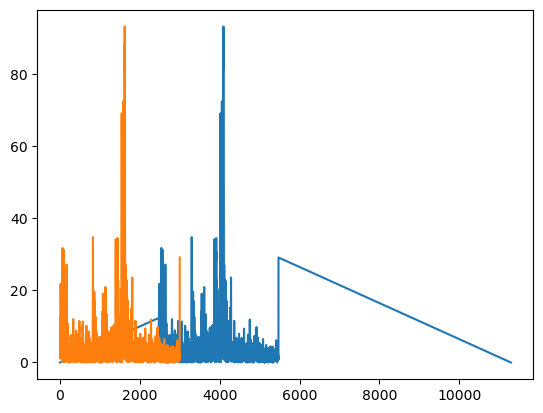

In [3]:
# print(data.shape)

def clippy(sound_data, a_max):
    clipped_data = np.zeros_like(sound_data)
    np.clip(sound_data, a_min = None, a_max= a_max, out=clipped_data)
    return clipped_data

    

# def no_static(sound_data, pad):
#     half_pad = int(pad/2)
#     old_shape = sound_data.shape
#     new_shape = (int(sound_data.shape[0]+(pad)),  )
    
#     new_data = np.zeros(new_shape)

#     r_pad = np.linspace(sound_data[sound_data.shape[0]-1], 0, num = half_pad)
#     l_pad = np.linspace(0, sound_data[0], num = half_pad)

#     new_data[half_pad:(old_shape[0]+half_pad)] = sound_data
#     new_data[0:half_pad] = l_pad
#     new_data[(old_shape[0]+half_pad):new_shape[0]] = r_pad
    
#     return new_data 

def no_static(sound_data, slope):
    old_shape = sound_data.shape
    old_size = sound_data.shape[0]
    first_value = sound_data[0]
    last_value = sound_data[sound_data.shape[0]-1]

    
    num_l_pad = np.abs(int(first_value*slope))
    num_r_pad = np.abs(int(last_value*slope))
    l_pad = np.linspace(0, sound_data[0], num = num_l_pad)
    r_pad = np.linspace(last_value, 0, num = num_r_pad)
    

    new_shape = (int(l_pad.shape[0] + old_size + r_pad.shape[0]),  )
    new_data = np.zeros(new_shape)
 
    new_data[l_pad.shape[0]:(old_size+l_pad.shape[0])] = sound_data
    new_data[0:l_pad.shape[0]] = l_pad
    new_data[(old_size+l_pad.shape[0]):new_shape[0]] = r_pad
        
    return new_data 



# def lpf(sound_data, fs, cutoff_freq):
#     b, a = scpsig.butter(N = 2, Wn = cutoff_freq, btype='lowpass', analog = False, output='ba', fs = fs)
#     y = scpsig.lfilter(b, a, sound_data)
#     return y

def lpf(sound_data, fs, low_cutoff_freq, high_cutoff_freq):
    b, a = scpsig.butter(N = 2, Wn = (low_cutoff_freq, high_cutoff_freq), btype='bandpass', analog = False, output='ba', fs = fs)
    y = scpsig.lfilter(b, a, sound_data)
    return y


sample_rate =  44100
lo_cutoff = .75
cutoff = 1000 # SAM Rate 


data_lpf = lpf(sound_data, sample_rate, lo_cutoff, cutoff)
clip_data = clippy(sound_data, 30)
    
play_data = sound_data
play_data = no_static(play_data, 0)

sns.lineplot(no_static(sound_data, 200))

sns.lineplot(play_data)




In [4]:
sd.play(sound_data, samplerate=2205)


In [13]:
sd.play(play_data, samplerate=2205)

import scipy.io as spio


print(play_data[np.argmax(play_data)])
print(play_data[1641])
# print(play_data[1641].type)

old_min = play_data[np.argmin(play_data)]
old_max = play_data[np.argmax(play_data)]

new_min = -1
new_max = 1


# Map values from the original range to the new range
remapped_data = np.float32(no_static(((play_data - old_min) * (new_max - new_min) / (old_max - old_min) + new_min), 100))


# spio.wavfile.write("pleb.wav", rate=44100, data = remapped_data)


93.1995485
25.03970335
